In [1]:
import datasets

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pathlib import Path
from glob import glob

In [3]:
participants = [Path(path).stem for path in glob('../data/ecg_features_60s_clean_twa/*.csv')]

In [4]:
dataset = datasets.load_dataset(
    '../data/ecg_features_60s_clean_twa', 
    train_participants=participants,
    trust_remote_code=True
)

In [5]:
def encode(samples):
    baseline = ['Sitting', 'Recov1', 'Recov2', 'Recov3', 'Recov4', 'Recov5', 'Recov6']
    mental_stress = ['TA', 'SSST_Sing_countdown', 'Pasat', 'Raven', 'TA_repeat', 'Pasat_repeat']
    high_physical_stress = ['Treadmill1', 'Treadmill2', 'Treadmill3', 'Treadmill4', 'Walking_fast_pace', 'Cycling', 'stairs_up_and_down']
    moderate_physical_stress = ['Walking_own_pace', 'Dishes', 'Vacuum']
    low_physical_stress = ['Standing', 'Lying_supine', 'Recov_standing']
    
    def encode_multiclass(label):
        if label in baseline:
            return 0
        elif label in mental_stress:
            return 1
        elif label in high_physical_stress:
            return 2
        elif label in moderate_physical_stress:
            return -1
        elif label in low_physical_stress:
            return -1
        else:
            return -1
        
    return {
        'label': [encode_multiclass(label) for label in samples['label']],
    }

In [6]:
dataset['fit'] = dataset['fit'].map(encode, batched=True, batch_size=2048, num_proc=4)

In [7]:
X_labels =  [
    'hrv_mean',
    'hrv_min',
    'hrv_max',
    'hrv_std',
    'hrv_rms',
    'TINN',
    'hr_mean',
    'hr_min',
    'hr_max',
    'hr_std',
    'rr_mean',
    'rr_min',
    'rr_max',
    'rr_std',
    'nn50',
    'pnn50',
    'rmssd',
    'ulf',
    'vlf',
    'lf',
    'hf',
    'vhf',
    'uhf',
    'tp',
    'lf_hf_ratio',
    'lp_ulf',
    'lp_vlf',
    'lp_lf',
    'lp_hf',
    'lp_vhf',
    'lp_uhf',
    'lf_normalized',
    'hf_normalized',
    'twa'
]
y_label = 'label'

In [8]:
train = dataset['fit'].to_pandas()

In [9]:
train

,label,hrv_mean,hrv_min,hrv_max,hrv_std,hrv_rms,TINN,hr_mean,hr_min,hr_max,...,lf_hf_ratio,lp_ulf,lp_vlf,lp_lf,lp_hf,lp_vhf,lp_uhf,lf_normalized,hf_normalized,twa
0,-1,1.105925,0.874,1.325,0.110012,1.111280,0.451000,54.793165,45.283019,68.649886,...,0.829565,0.0,0.0,43.595282,52.551983,3.130002,0.722733,0.435953,0.525520,1.796423e-05
1,-1,1.105925,0.874,1.325,0.110012,1.111280,0.451000,54.793165,45.283019,68.649886,...,0.829565,0.0,0.0,43.595282,52.551983,3.130002,0.722733,0.435953,0.525520,1.796423e-05
2,-1,1.101333,0.858,1.325,0.114073,1.107116,0.467000,55.073478,45.283019,69.930070,...,1.076185,0.0,0.0,50.491856,46.917455,2.080558,0.510130,0.504919,0.469175,1.796423e-05
3,-1,1.101333,0.858,1.325,0.114073,1.107116,0.467000,55.073478,45.283019,69.930070,...,1.076185,0.0,0.0,50.491856,46.917455,2.080558,0.510130,0.504919,0.469175,2.080290e-05
4,-1,1.100358,0.858,1.325,0.114937,1.106232,0.467000,55.130748,45.283019,69.930070,...,1.144964,0.0,0.0,51.646243,45.107321,2.631926,0.614510,0.516462,0.451073,2.080290e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883579,0,1.020891,0.472,5.085,0.971295,1.403025,1.281389,86.651993,11.799410,127.118644,...,4.220962,0.0,0.0,80.751175,19.130990,0.063150,0.054685,0.807512,0.191310,2.867071e-07
3883580,0,1.029222,0.472,5.085,0.978430,1.413823,1.218528,86.310756,11.799410,127.118644,...,2.520531,0.0,0.0,71.463038,28.352378,0.092185,0.092400,0.714630,0.283524,2.867071e-07
3883581,0,1.029222,0.472,5.085,0.978430,1.413823,1.218528,86.310756,11.799410,127.118644,...,2.520531,0.0,0.0,71.463038,28.352378,0.092185,0.092400,0.714630,0.283524,1.910131e-06
3883582,0,1.037906,0.472,5.085,0.985690,1.424957,1.241962,85.949673,11.799410,127.118644,...,4.642823,0.0,0.0,82.161732,17.696504,0.089041,0.052723,0.821617,0.176965,1.910131e-06


In [10]:
import matplotlib.pyplot as plt

In [18]:
from sklearn.preprocessing import MinMaxScaler

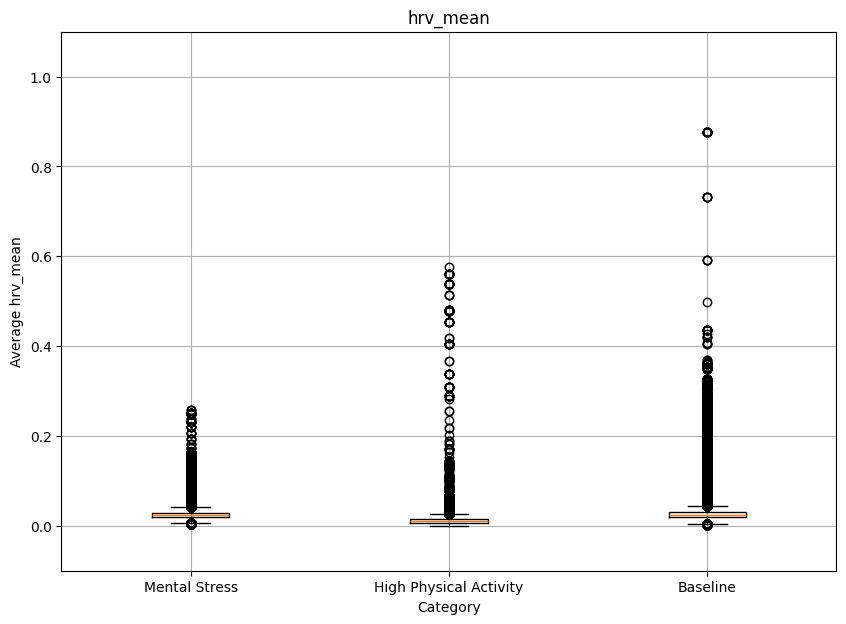

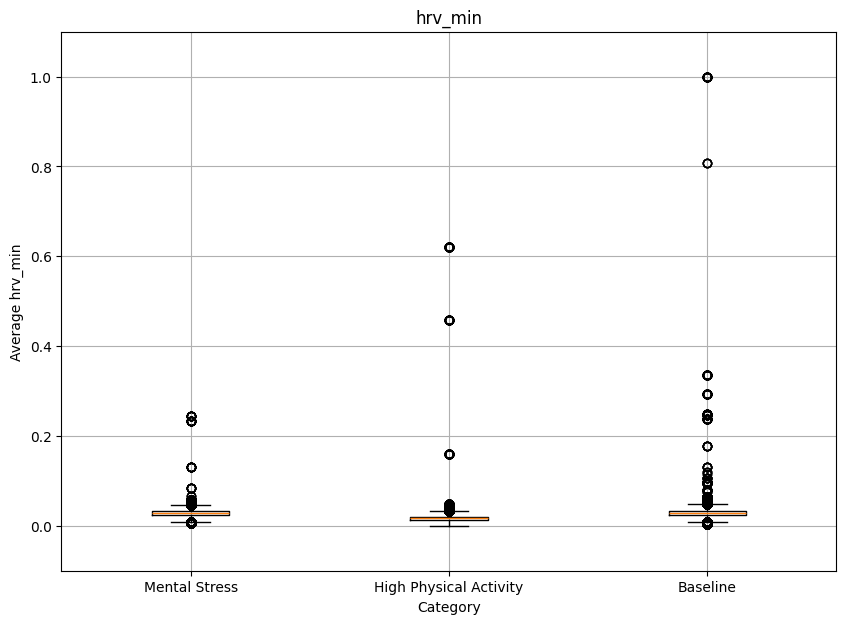

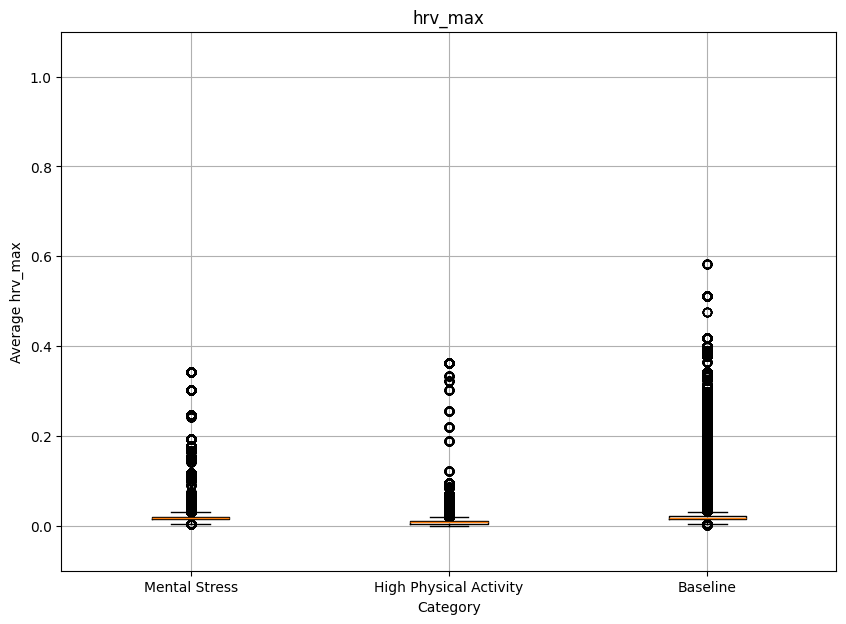

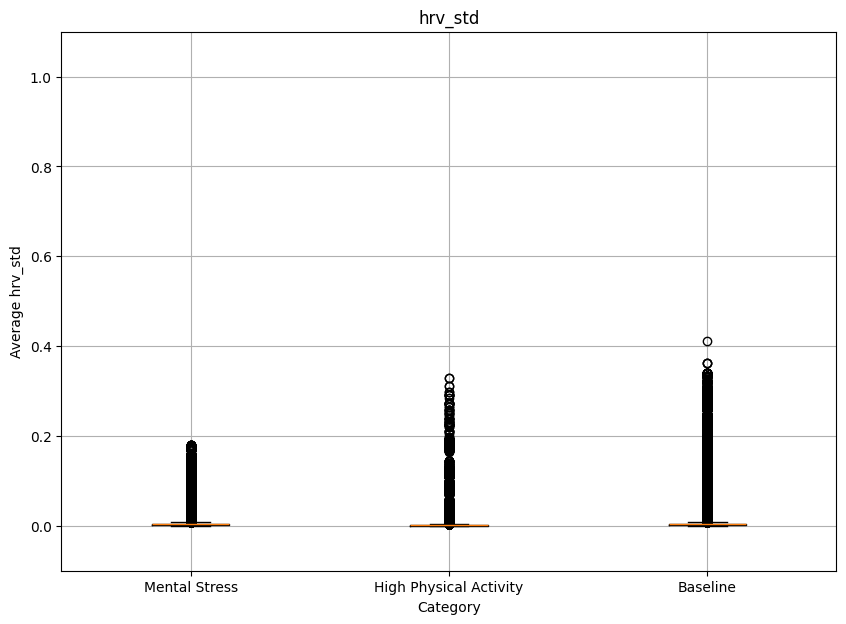

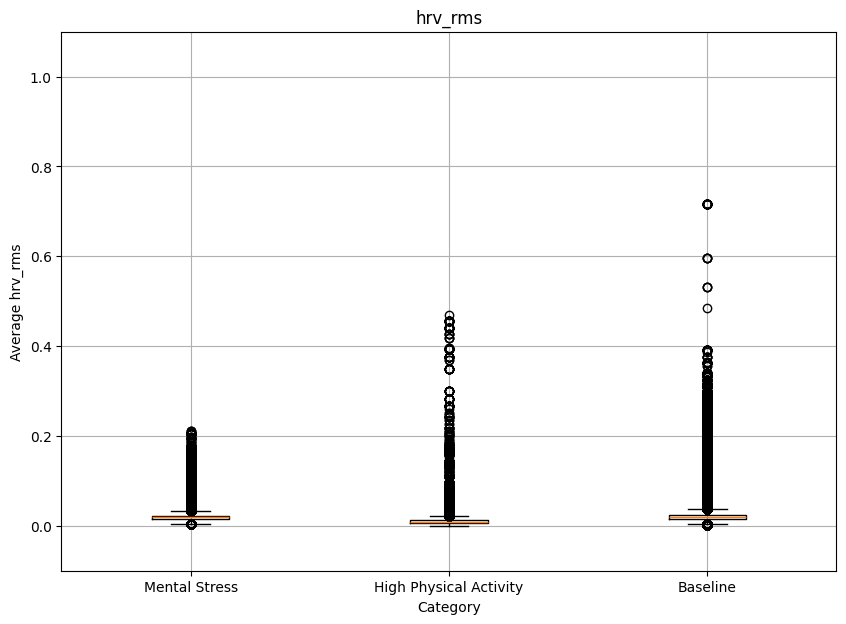

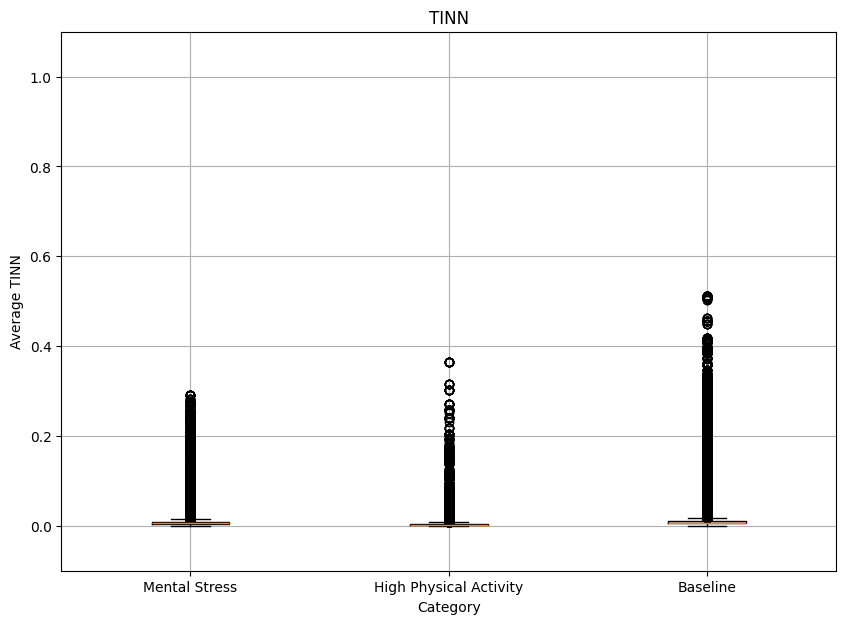

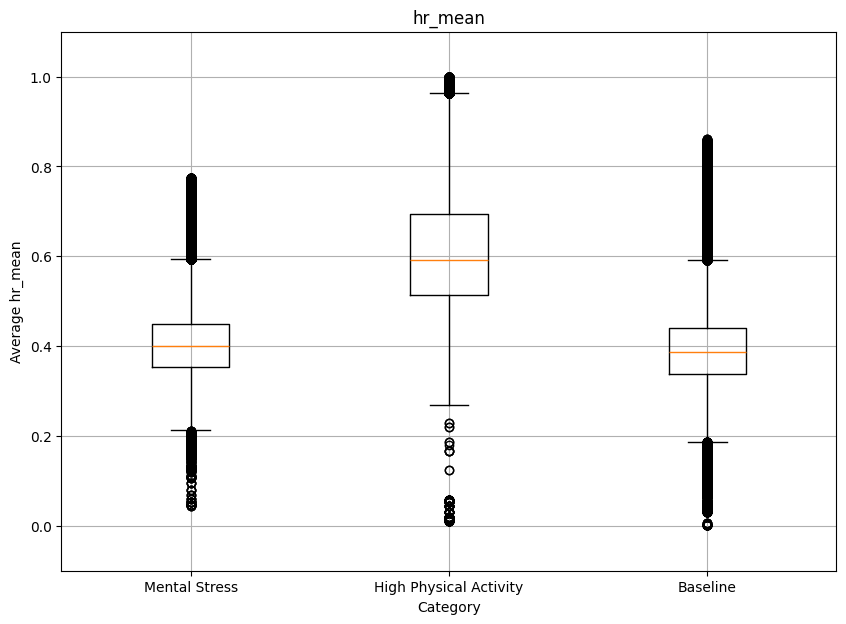

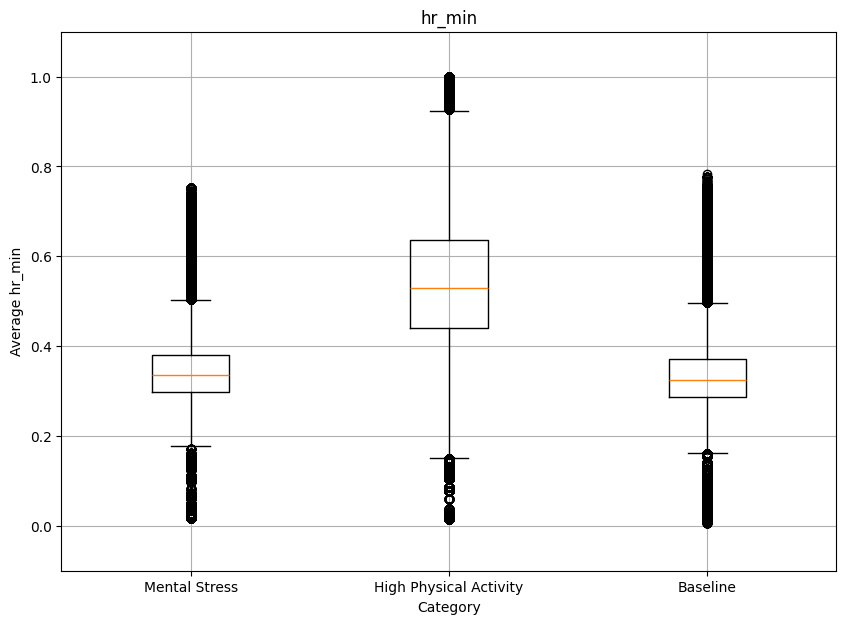

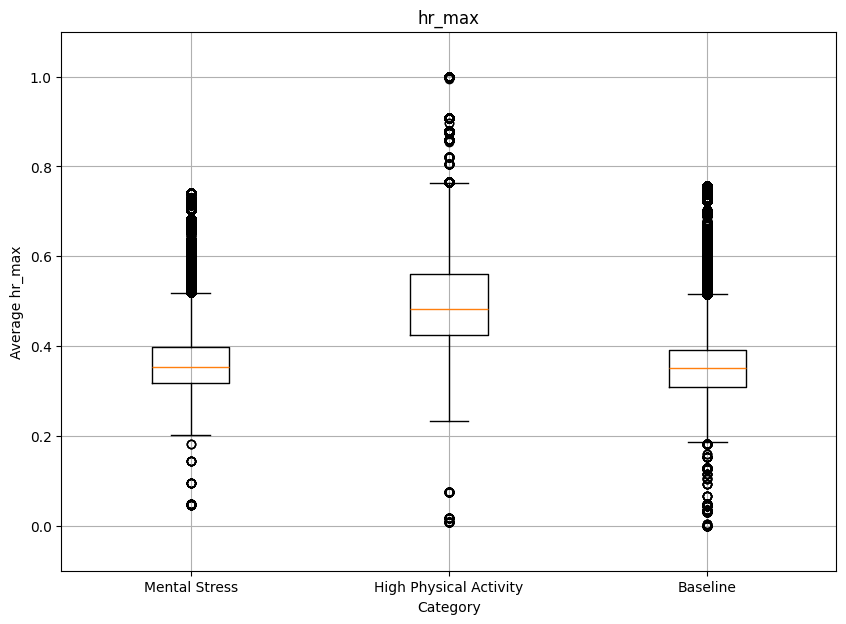

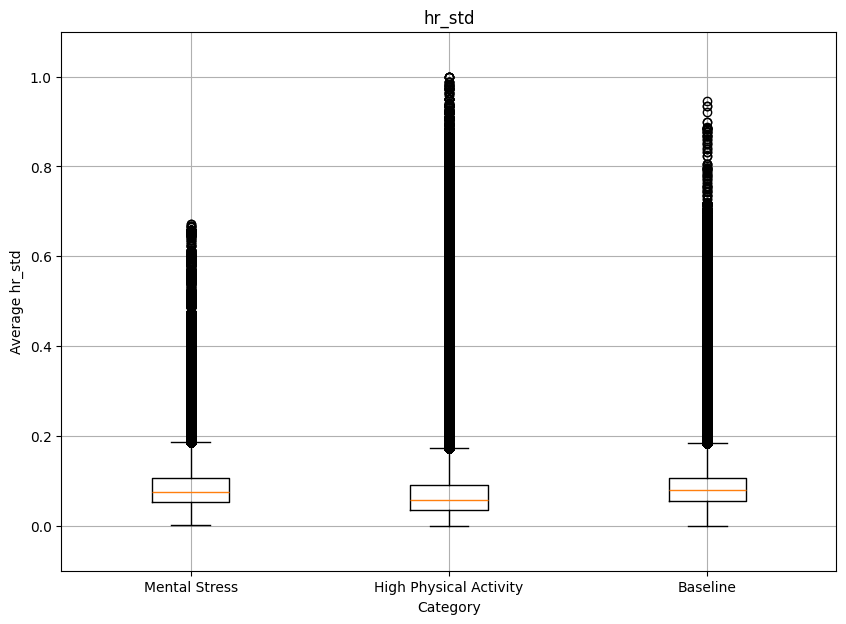

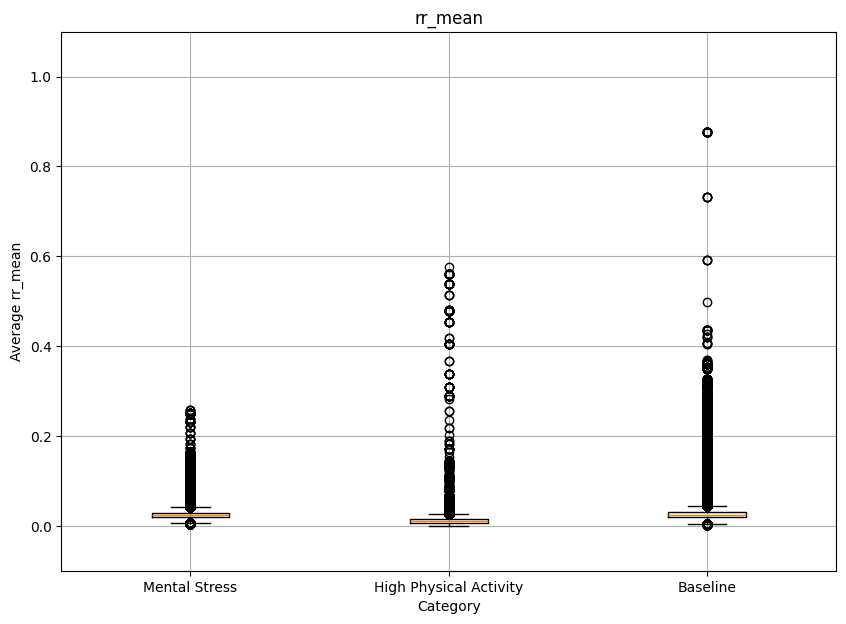

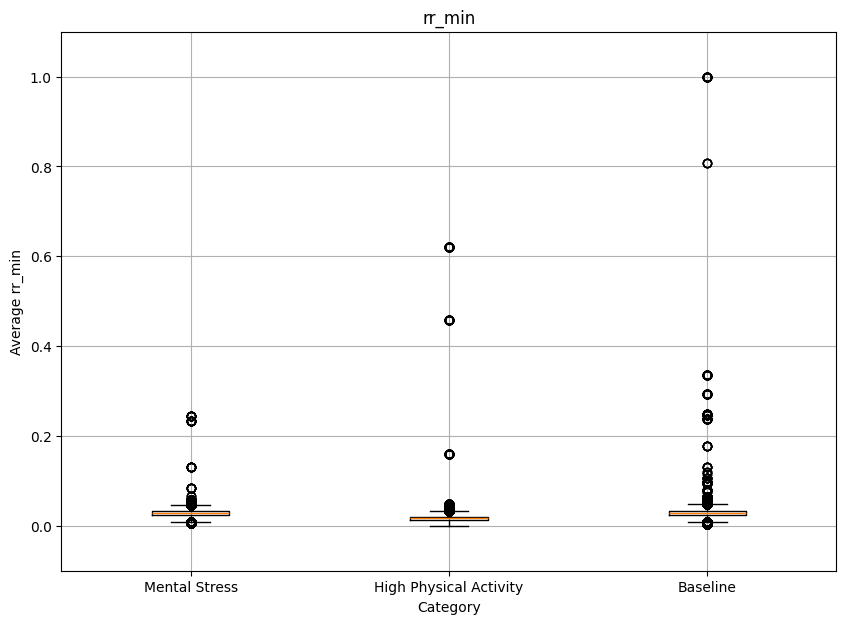

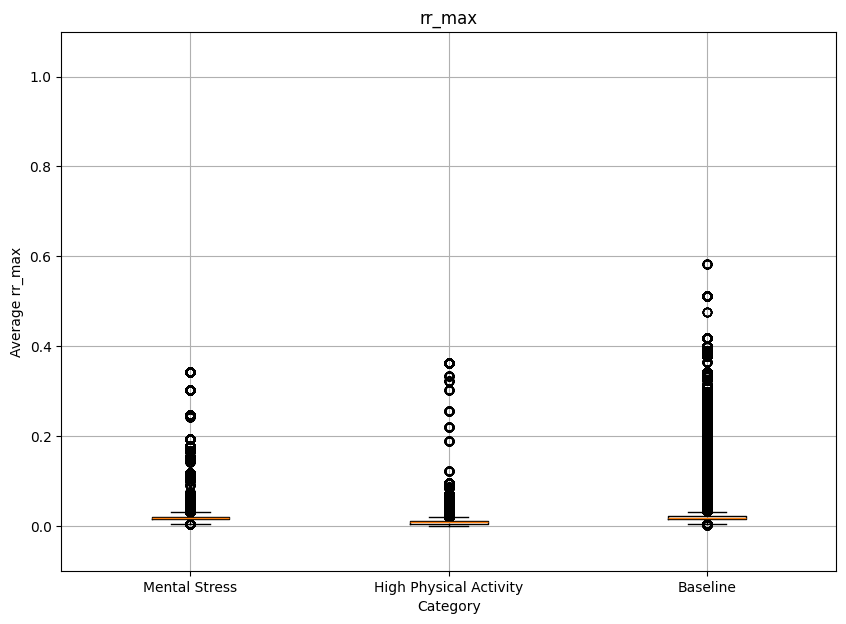

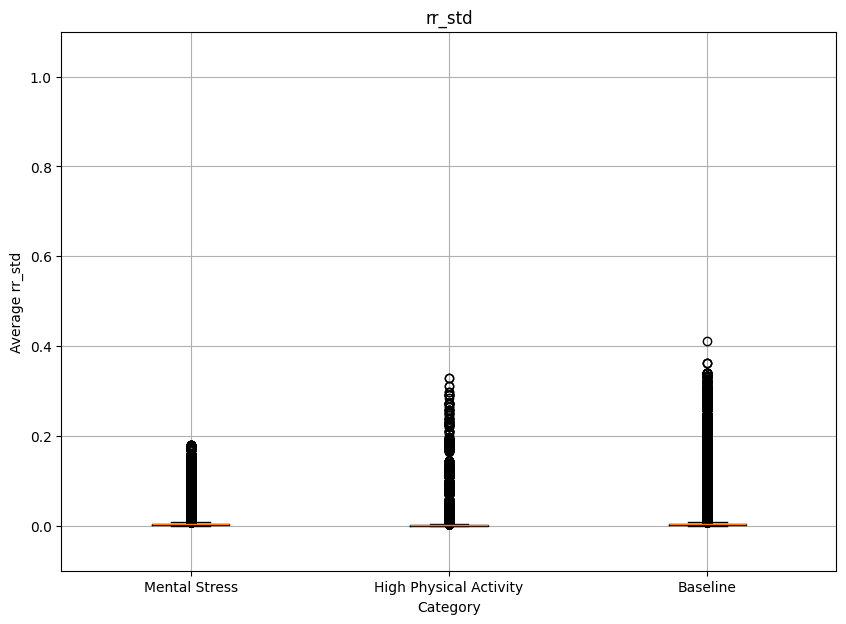

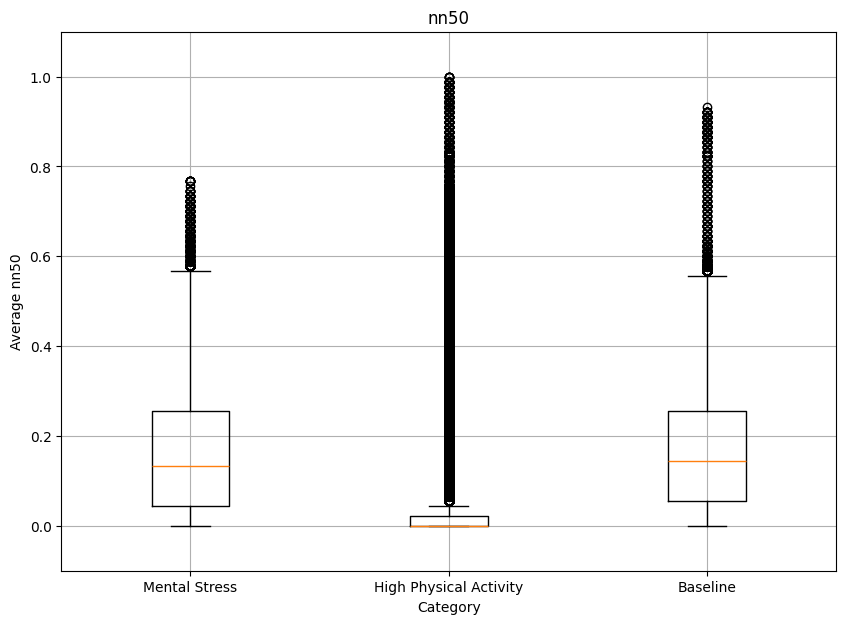

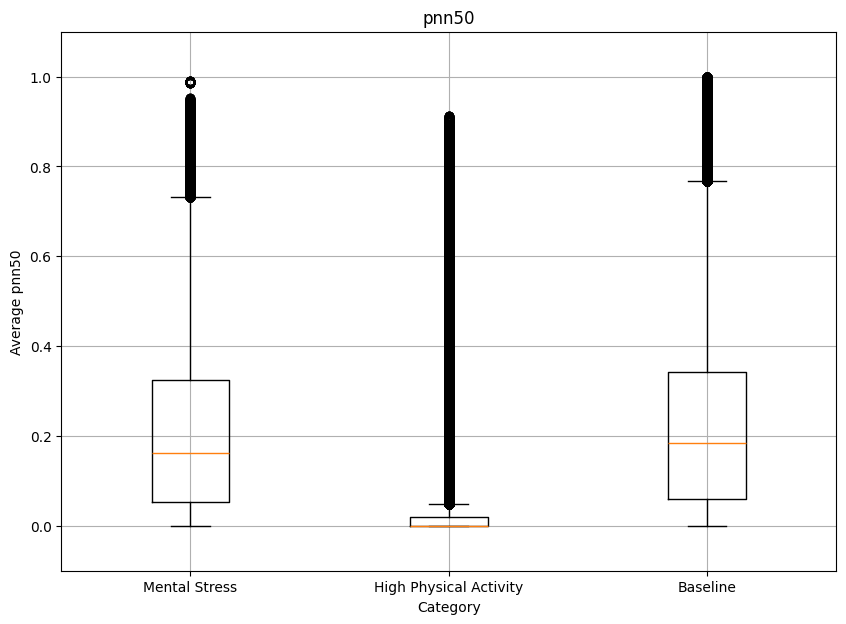

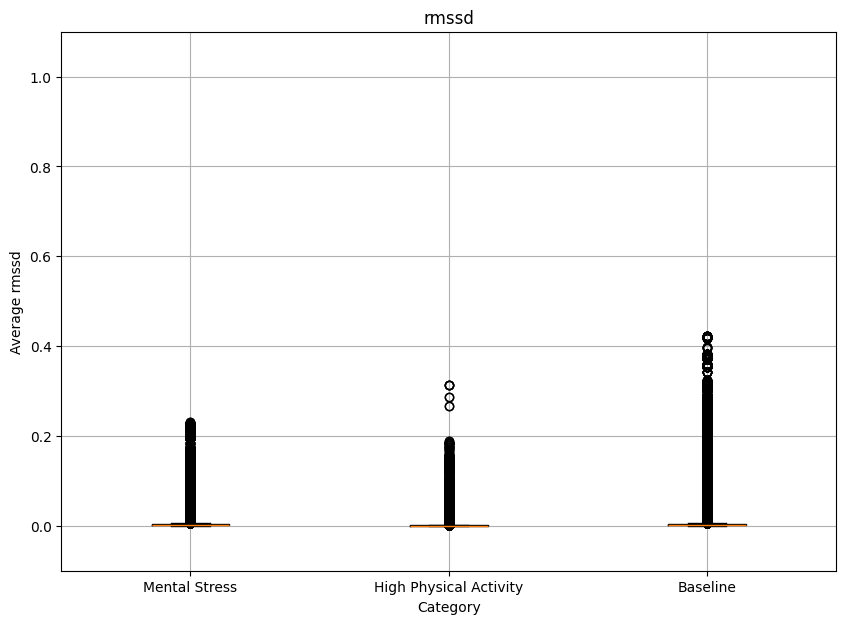

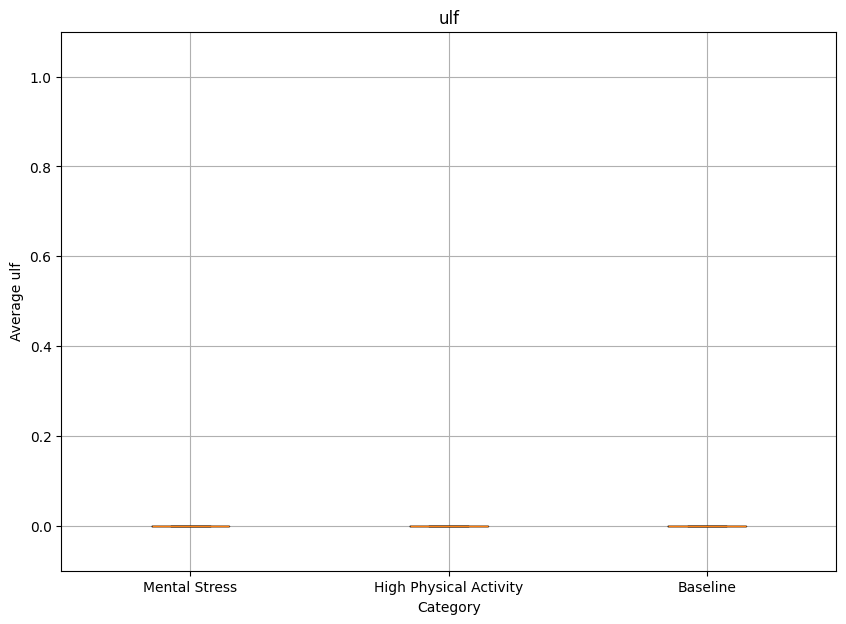

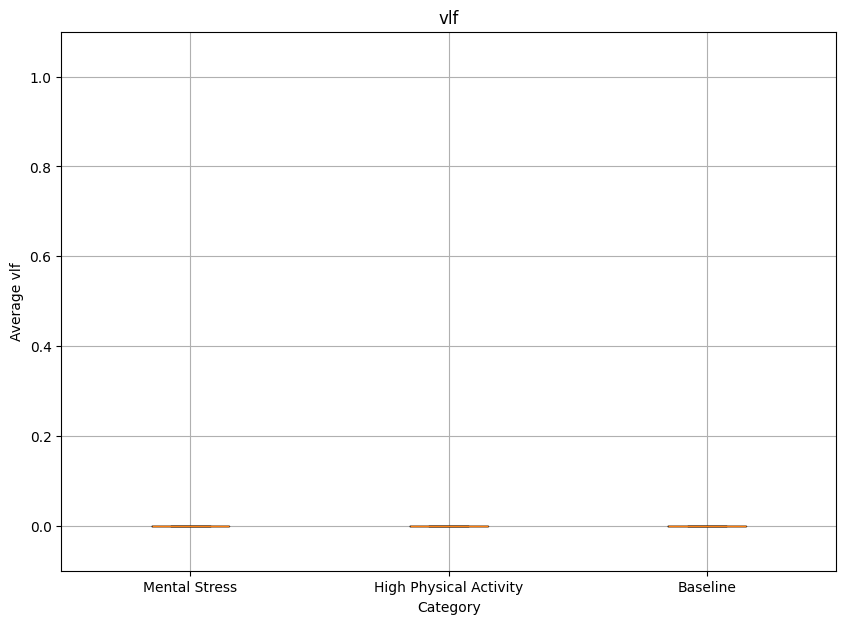

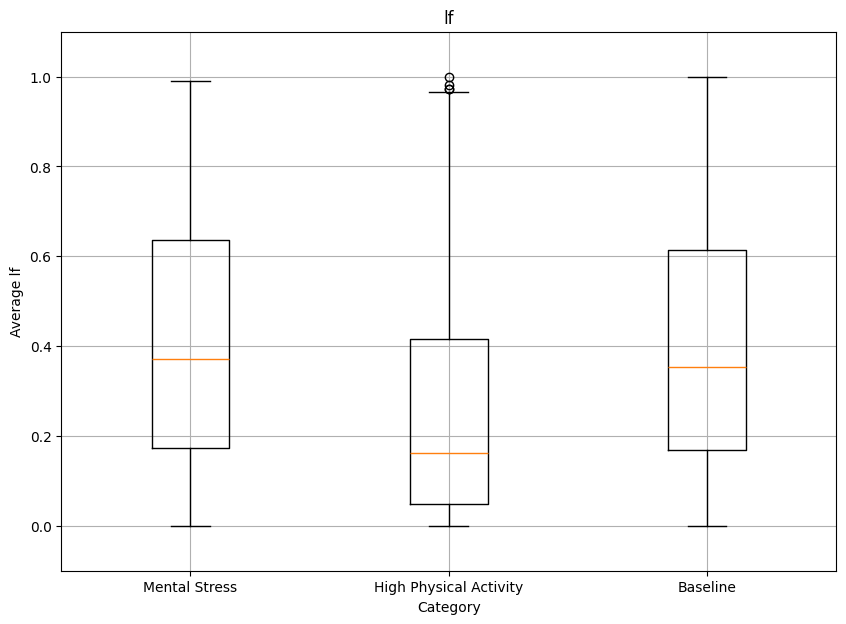

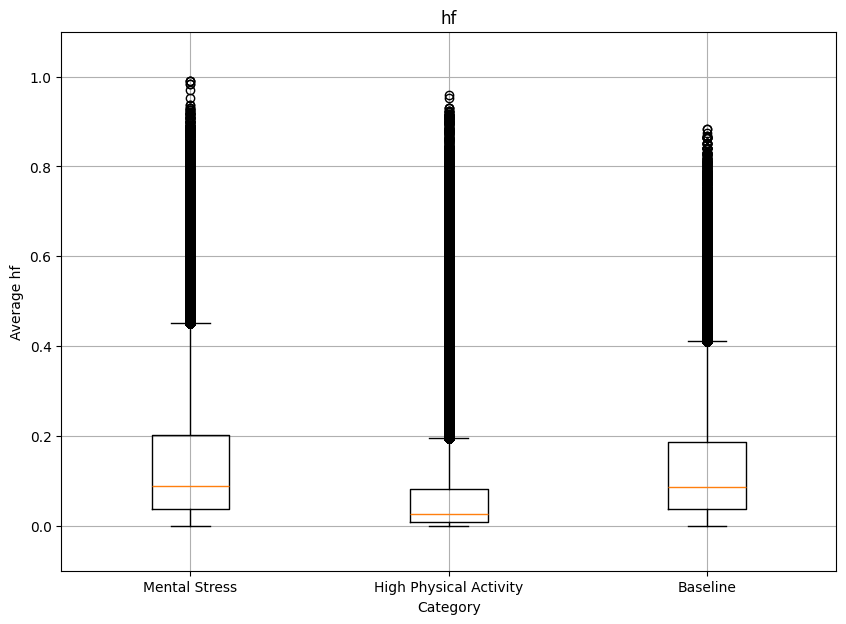

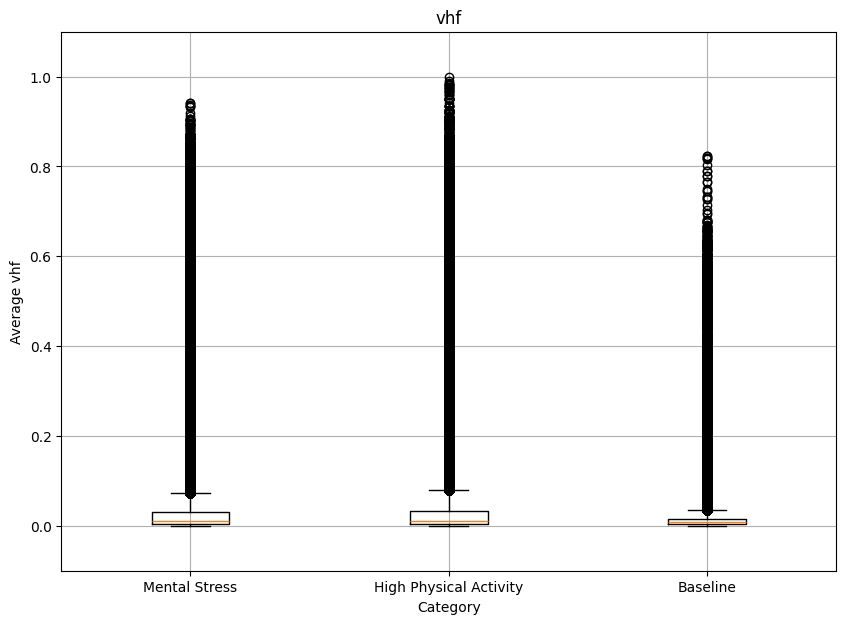

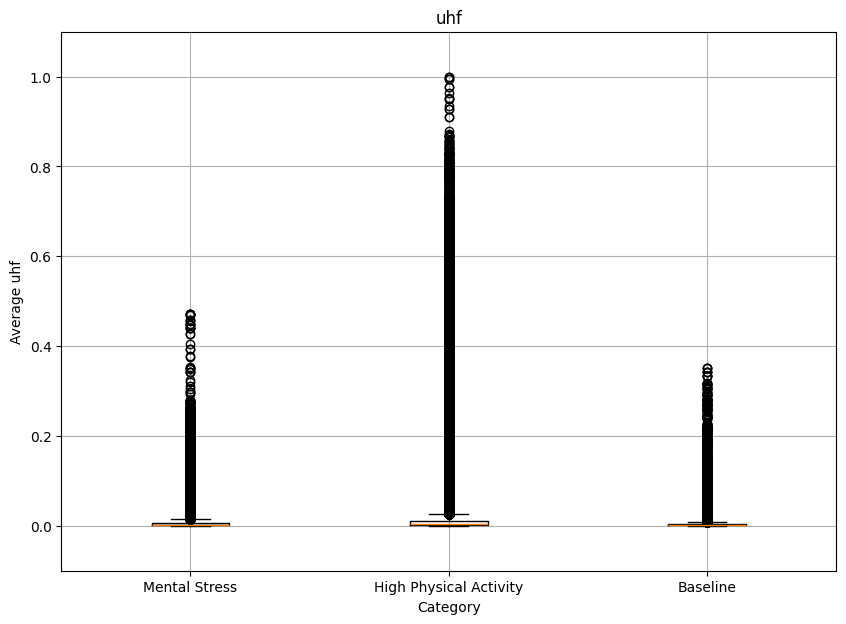

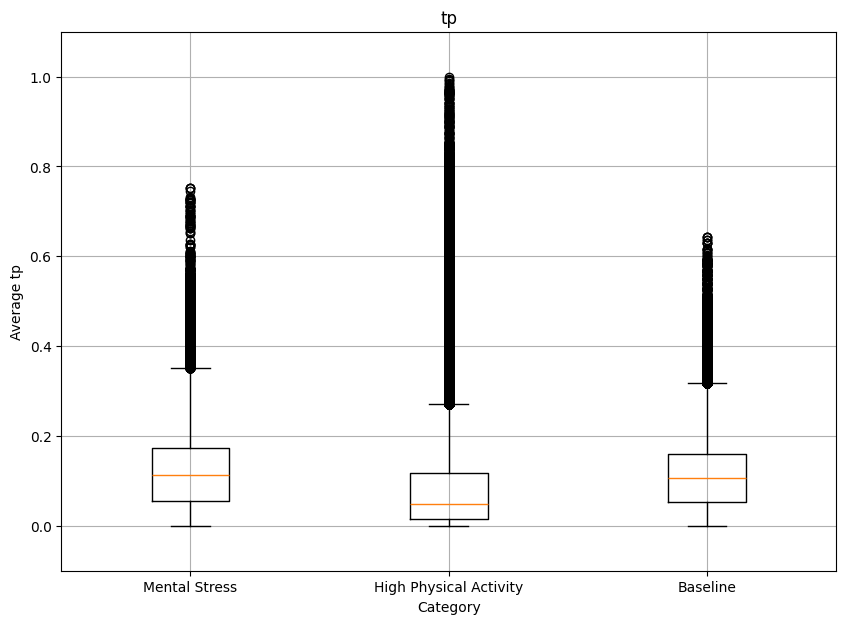

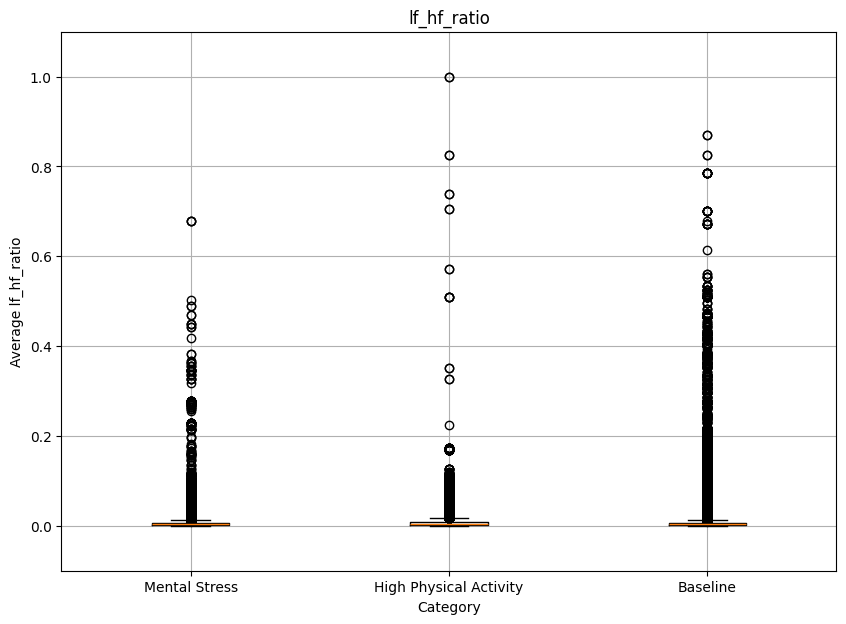

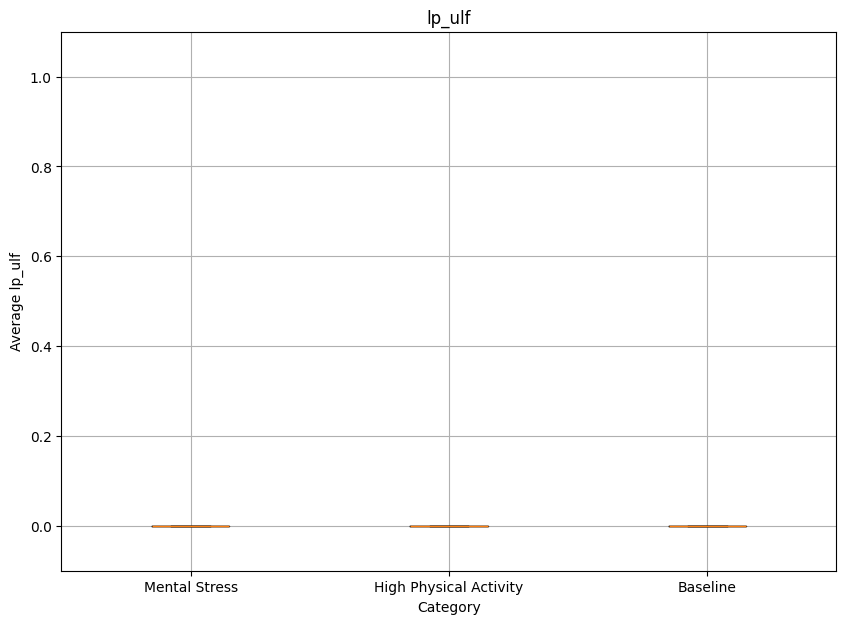

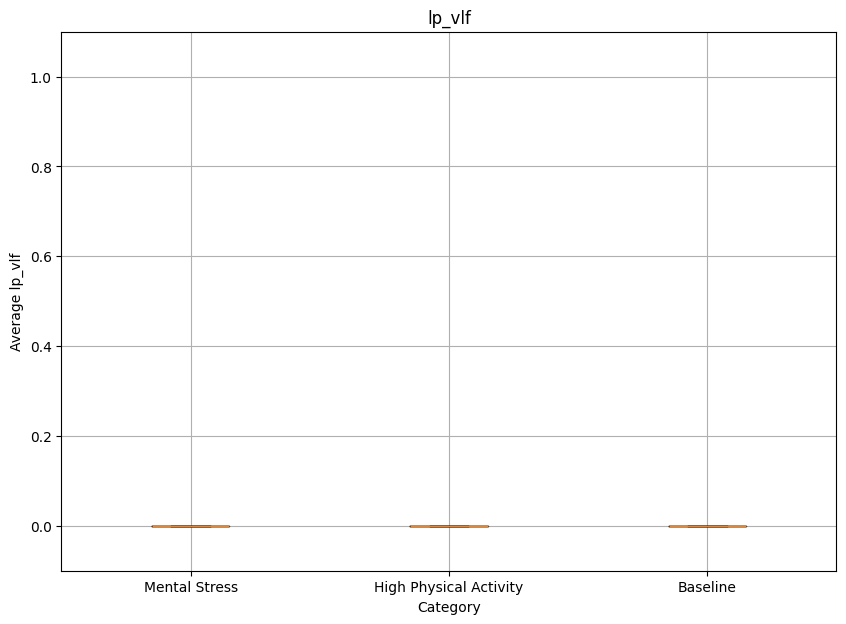

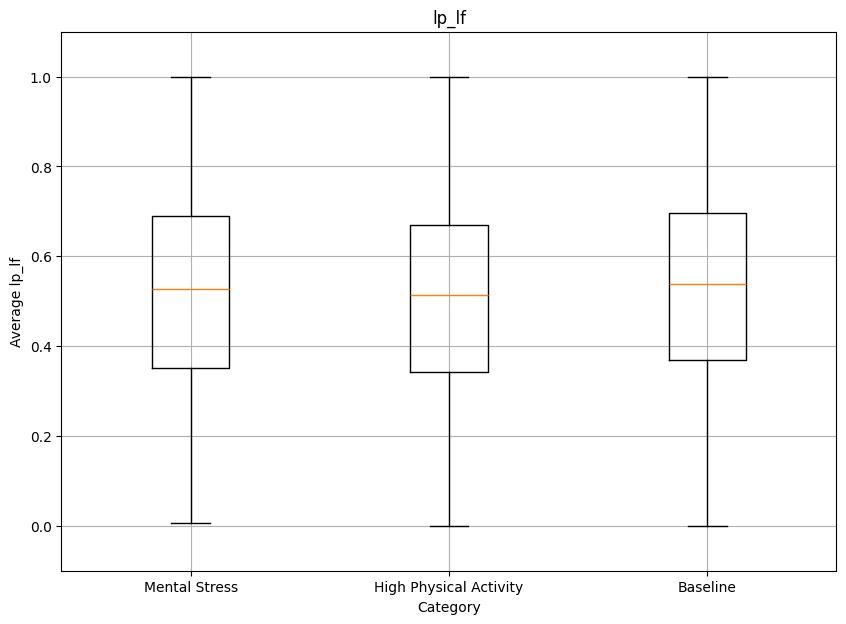

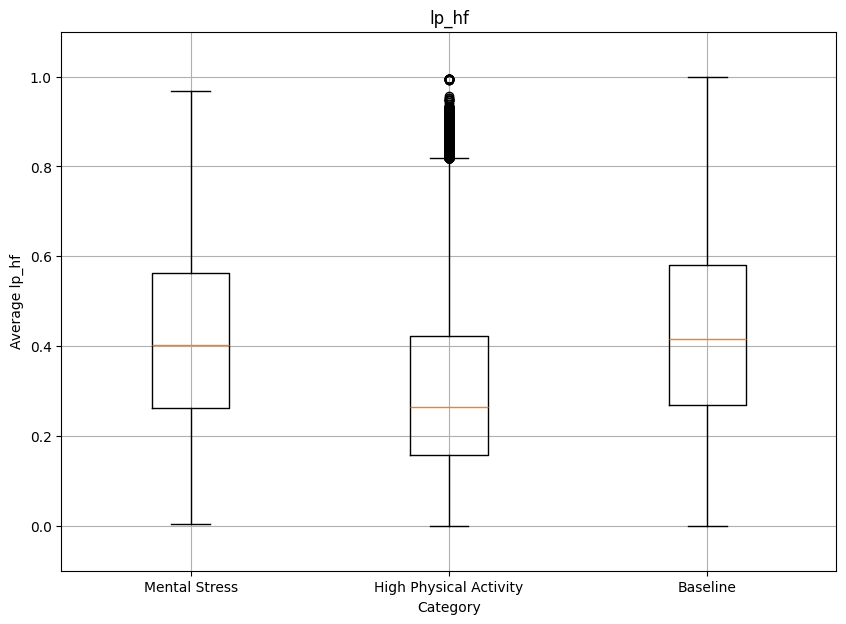

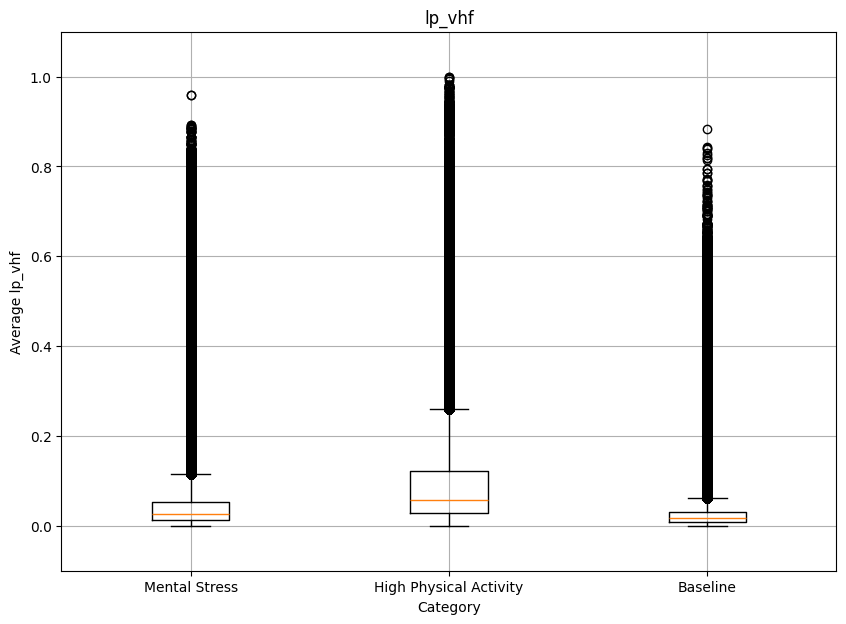

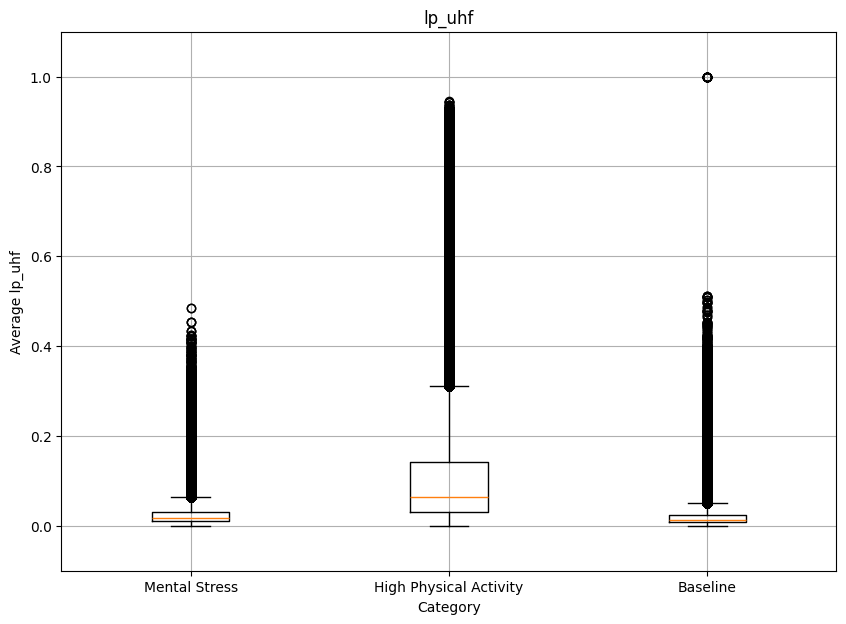

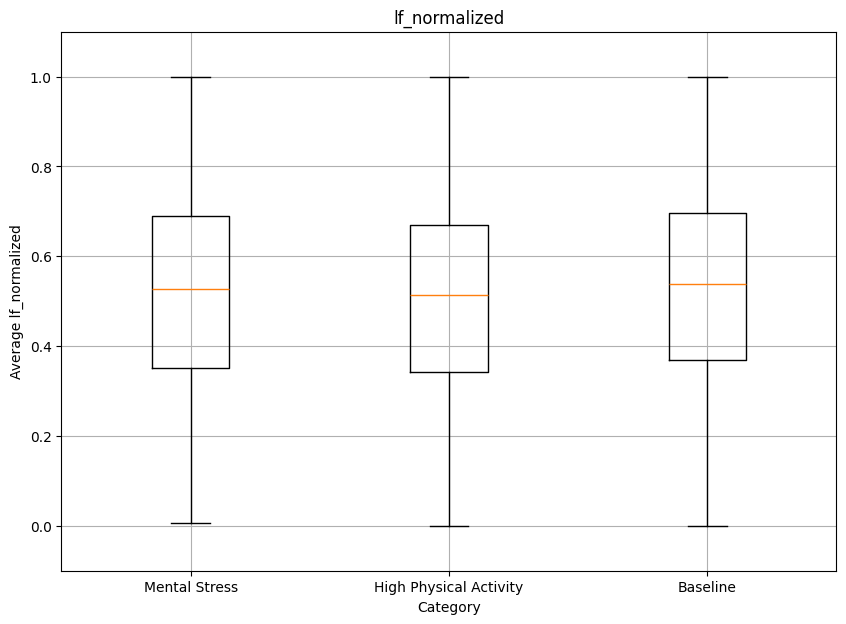

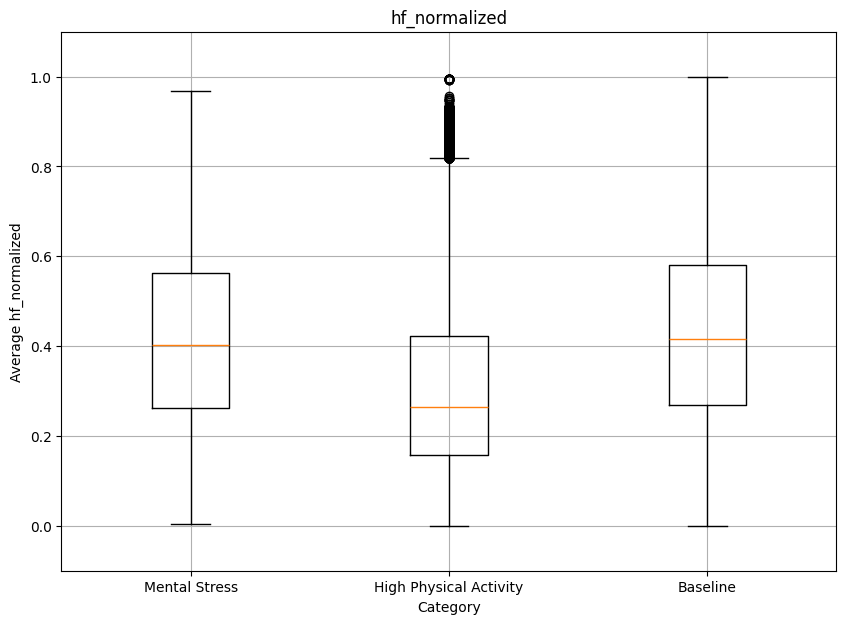

C:\Users\Admin\AppData\Local\Temp\ipykernel_22860\3147325700.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[feature] = scaler.fit_transform(subset[feature].values.reshape(-1, 1))


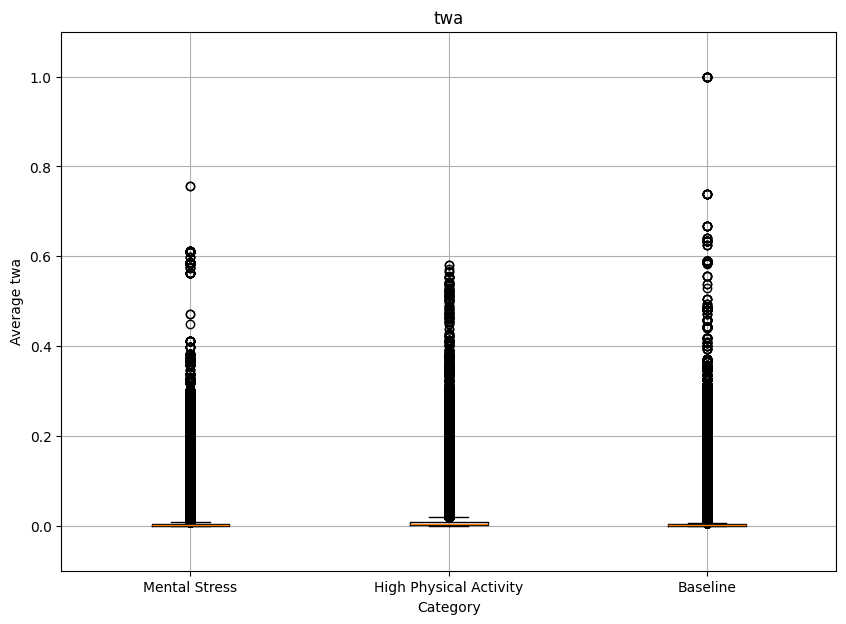

In [20]:
for feature in X_labels:
    fig, ax=plt.subplots(figsize=(10,7))

    subset = train
    if feature == 'twa':
        subset[feature] = subset[feature].fillna(0)
        subset = subset[subset[feature] != 0]

    scaler = MinMaxScaler()
    subset[feature] = scaler.fit_transform(subset[feature].values.reshape(-1, 1))

    ax.boxplot([
        subset[subset['label'] == 1][feature],
        subset[subset['label'] == 2][feature], 
        subset[subset['label'] == 0][feature]
    ], labels=['Mental Stress', 'High Physical Activity', 'Baseline'])
    ax.set_title(f'{feature}')
    ax.set_xlabel('Category')
    ax.set_ylabel(f'Average {feature}')
    ax.set_ylim(-0.1, 1.1)
    plt.savefig(f'../public/{feature}.png', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.grid()
    plt.show()

In [22]:
dataset_signal = datasets.load_dataset(
    '../data/ecg_preprocessed', 
    train_participants=participants,
    trust_remote_code=True,
    num_proc=8
)

Generating fit split: 979678000 examples [15:16, 1068450.13 examples/s]


In [24]:
def encode(samples):
    baseline = ['Sitting', 'Recov1', 'Recov2', 'Recov3', 'Recov4', 'Recov5', 'Recov6']
    mental_stress = ['TA', 'SSST_Sing_countdown', 'Pasat', 'Raven', 'TA_repeat', 'Pasat_repeat']
    high_physical_stress = ['Treadmill1', 'Treadmill2', 'Treadmill3', 'Treadmill4', 'Walking_fast_pace', 'Cycling', 'stairs_up_and_down']
    moderate_physical_stress = ['Walking_own_pace', 'Dishes', 'Vacuum']
    low_physical_stress = ['Standing', 'Lying_supine', 'Recov_standing']
    
    def encode_multiclass(label):
        if label in baseline:
            return 0
        elif label in mental_stress:
            return 1
        elif label in high_physical_stress:
            return 2
        elif label in moderate_physical_stress:
            return -1
        elif label in low_physical_stress:
            return -1
        else:
            return -1
        
    return {
        'label': [encode_multiclass(label) for label in samples['category']],
    }

In [25]:
dataset_signal['fit'] = dataset_signal['fit'].map(encode, batched=True, batch_size=2048, num_proc=4)

Map (num_proc=4): 100%|██████████| 979678000/979678000 [24:36<00:00, 663392.56 examples/s] 


In [44]:
import pandas as pd

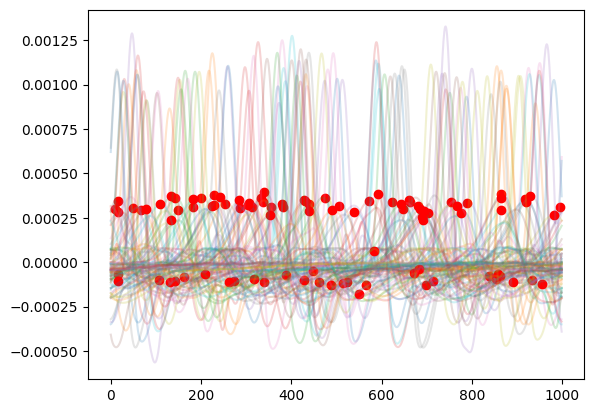

In [60]:
window_size = 1000
for i in range(100):
    start_idx = i*window_size
    sample = pd.DataFrame(dataset_signal['fit'][start_idx:start_idx+window_size]) 
    tpeaks = sample[sample['ECG_T_Peaks'] == 1.0]
    plt.plot(sample['ECG_Clean'], alpha=0.2)
    plt.plot(tpeaks.index, tpeaks['ECG_Clean'], 'ro')